# Building dataframe

Import needed library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Build dataframe for training set

In [28]:
dataframe = pd.read_csv('D:\\Study\\2022_2\\Machine Learning\\Project\\output_file.csv')
print(dataframe.shape)
dataframe.head()

(385272, 30)


,make,model,variant,car_price,car_badges,car_title,car_sub_title,car_attention_grabber,car_seller,car_seller_rating,...,num_owner,ulez,full_service,part_service,part_warranty,full_dealership,first_year_road_tax,brand_new,finance_available,discounted
0,Citroen,DS3,DStyle Red,4495.0,"'Good price', 'Finance available'",Citroen DS3,1.6 VTi DStyle Red 3dr,LONG MOT+FSH+ULEZ FREE+DLVRY,A&R Motor Sales,4.7,...,NaN,1,1,0,0,0,0,0,1,0
1,Land Rover,Discovery Sport,D180,37500.0,"'Good price', 'Approved used', 'Finance availa...",Land Rover New Discovery Sport,D180 SE Diesel MHEV 2.0 5dr,NaN,Barretts Land Rover,5.0,...,NaN,1,1,0,0,0,0,0,1,0
2,Ford,Puma,Titanium,22990.0,"'Good price', 'Finance available'",Ford Puma,1.0 EcoBoost Titanium 5dr Auto ** Vey Rare Car **,Low Mileage,Trust Ford Birmingham,4.6,...,1.0,1,0,0,0,0,0,0,1,0
3,Mercedes-Benz,A Class,A250e,38620.0,"'Good price', 'Finance available'",Mercedes-Benz A Class,A250e AMG Line Premium Plus Edition 5dr Auto 1.3,PREMIUM PLUS PACK + NIGHT PACK,Hippo Prestige,4.6,...,1.0,1,0,0,0,0,0,0,1,0
4,Citroen,C2,VTR,1490.0,'',Citroen C2,1.4i VTR 3dr,SPORT - LOW MILEAGE,Ideal Car Ltd,4.8,...,4.0,1,0,0,0,0,0,0,0,0


# Data Analysis and Preprocessing


## Handle missing value

In [29]:
dataframe = dataframe.dropna()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146520 entries, 2 to 385267
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   make                   146520 non-null  object 
 1   model                  146520 non-null  object 
 2   variant                146520 non-null  object 
 3   car_price              146520 non-null  float64
 4   car_badges             146520 non-null  object 
 5   car_title              146520 non-null  object 
 6   car_sub_title          146520 non-null  object 
 7   car_attention_grabber  146520 non-null  object 
 8   car_seller             146520 non-null  object 
 9   car_seller_rating      146520 non-null  float64
 10  car_seller_location    146520 non-null  object 
 11  year                   146520 non-null  float64
 12  reg                    146520 non-null  object 
 13  body_type              146520 non-null  object 
 14  miles                  146520 non-null  f

## Handling outliers

In [30]:
train_outliers=dataframe.loc[:, ['car_price', 'year', 'engine_vol', 'engine_size', 'miles']]

train_outliers.head()

,car_price,year,engine_vol,engine_size,miles
2,22990.0,2020.0,1.0,125.0,7589.0
3,38620.0,2021.0,1.3,218.0,16518.0
4,1490.0,2010.0,1.4,75.0,79808.0
6,3385.0,2011.0,1.6,126.0,118533.0
7,19470.0,2018.0,2.1,136.0,51272.0


In [31]:
dataframe.loc[:, ['car_price', 'year', 'engine_vol', 'engine_size', 'miles']].columns.tolist()

['car_price', 'year', 'engine_vol', 'engine_size', 'miles']

In [32]:
train_outliers = dataframe.filter(['car_price', 'year', 'engine_vol', 'engine_size', 'miles'] ,axis=1)

In [33]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in car_price is : 8850
NUmber of outliers in year is : 2805
NUmber of outliers in engine_vol is : 15306
NUmber of outliers in engine_size is : 10115
NUmber of outliers in miles is : 1653


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

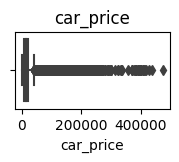

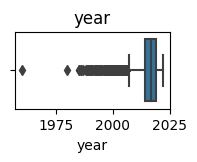

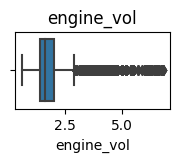

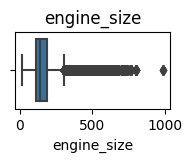

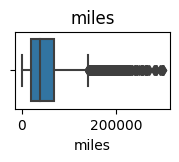

In [34]:
for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=train_outliers[col], whis=1.5)
    plt.title(col)
    plt.show()

Replace all outliers

In [35]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    dataframe = dataframe[(dataframe[col] >= range_low) & (dataframe[col] <= range_high)]
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in car_price is : 0
NUmber of outliers in year is : 0
NUmber of outliers in engine_vol is : 0
NUmber of outliers in engine_size is : 0
NUmber of outliers in miles is : 0


In [36]:
dataframe.shape

(123601, 30)

## Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoding_col = dataframe.select_dtypes(include='object')
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123601 entries, 2 to 385267
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   make                   123601 non-null  object
 1   model                  123601 non-null  object
 2   variant                123601 non-null  object
 3   car_badges             123601 non-null  object
 4   car_title              123601 non-null  object
 5   car_sub_title          123601 non-null  object
 6   car_attention_grabber  123601 non-null  object
 7   car_seller             123601 non-null  object
 8   car_seller_location    123601 non-null  object
 9   reg                    123601 non-null  object
 10  body_type              123601 non-null  object
 11  engine_size_unit       123601 non-null  object
 12  transmission           123601 non-null  object
 13  feul_type              123601 non-null  object
dtypes: object(14)
memory usage: 14.1+ MB


In [39]:
dataframe.select_dtypes(include='object').columns.tolist()

['make',
 'model',
 'variant',
 'car_badges',
 'car_title',
 'car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_location',
 'reg',
 'body_type',
 'engine_size_unit',
 'transmission',
 'feul_type']

In [40]:
encoding_col = dataframe.select_dtypes(include='object')
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col].astype(str))
    dataframe[col] = le.transform(encoding_col[col].astype(str))
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123601 entries, 2 to 385267
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   make                   123601 non-null  int32  
 1   model                  123601 non-null  int32  
 2   variant                123601 non-null  int32  
 3   car_price              123601 non-null  float64
 4   car_badges             123601 non-null  int32  
 5   car_title              123601 non-null  int32  
 6   car_sub_title          123601 non-null  int32  
 7   car_attention_grabber  123601 non-null  int32  
 8   car_seller             123601 non-null  int32  
 9   car_seller_rating      123601 non-null  float64
 10  car_seller_location    123601 non-null  int32  
 11  year                   123601 non-null  float64
 12  reg                    123601 non-null  int32  
 13  body_type              123601 non-null  int32  
 14  miles                  123601 non-null  f

## Choose appopriate columns

Text(0.5, 1.0, 'Correlation between the columns')

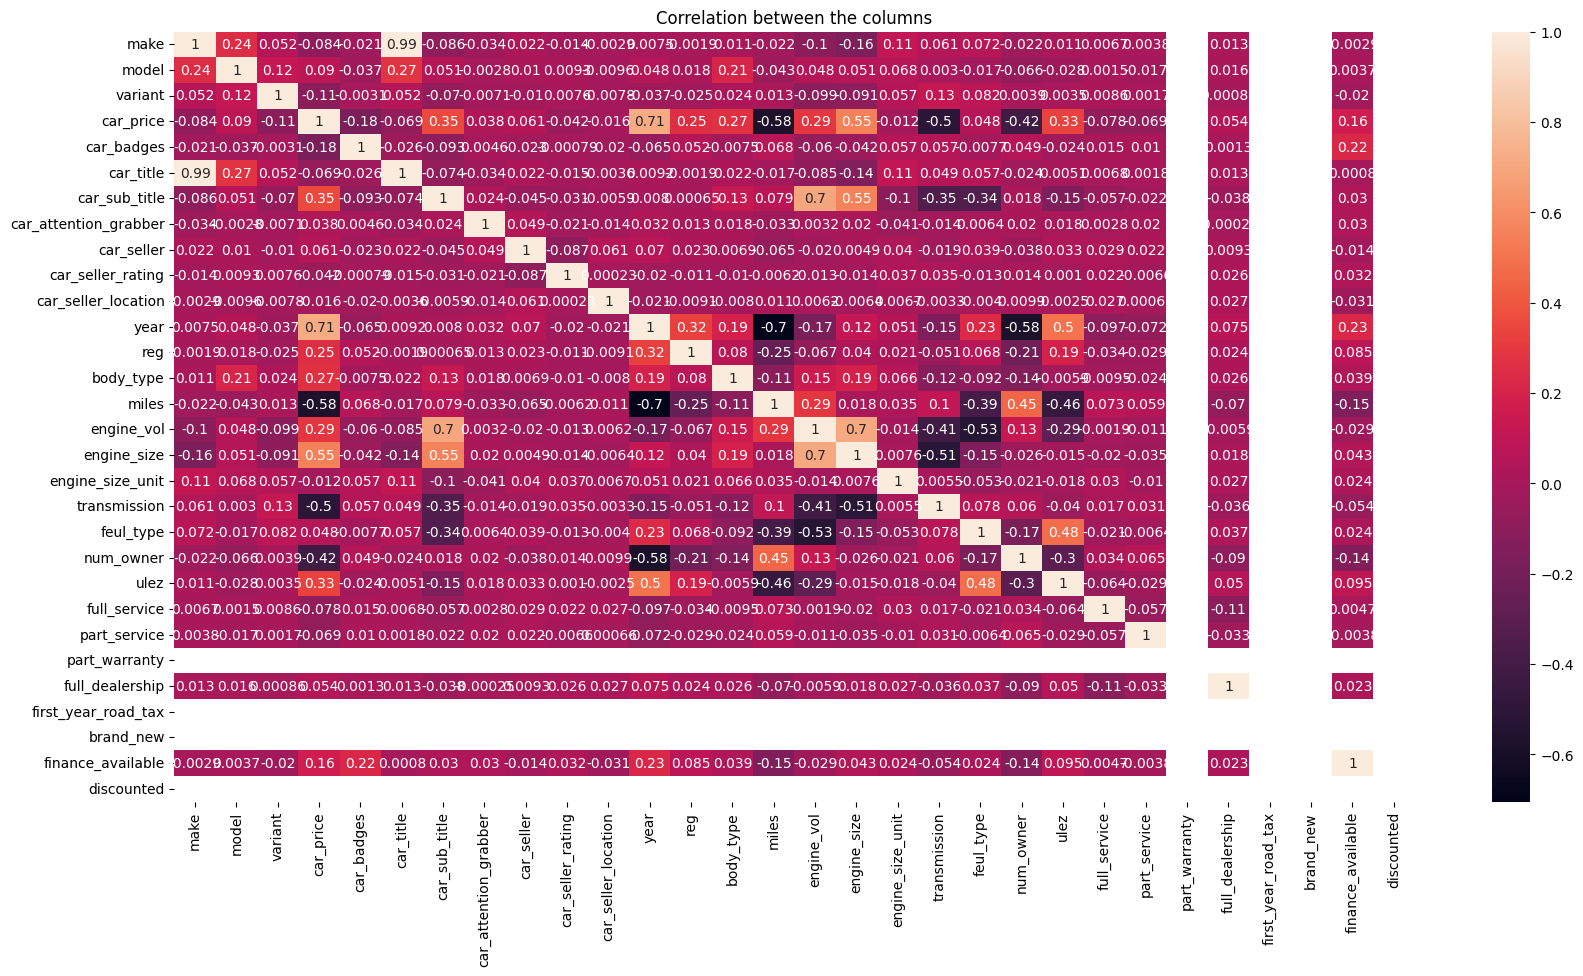

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.corr(),annot=True)
plt.title("Correlation between the columns")

Compute the correlation matrix with respect to 'car_price' column

In [42]:
corr_matrix = dataframe.corr()['car_price']

Select the top 10 columns with highest correlation to 'car_price'

In [43]:
top_10_cols = corr_matrix.abs().nlargest(11).iloc[1:].index

Take 'car_price' column

In [44]:
y = dataframe['car_price'].values

Drop the columns that are not in the top 10

In [61]:
dataframe = dataframe.drop(columns=dataframe.columns.difference(top_10_cols))
dataframe['car_price'] = y

In [62]:
dataframe

,car_sub_title,year,reg,body_type,miles,engine_vol,engine_size,transmission,num_owner,ulez,car_price
2,1279,2020.0,30,12,7589.0,1.0,125.0,0,1.0,1,22990.0
3,38130,2021.0,31,11,16518.0,1.3,218.0,0,1.0,1,38620.0
4,11521,2010.0,19,6,79808.0,1.4,75.0,1,4.0,1,1490.0
6,15937,2011.0,4,6,118533.0,1.6,126.0,0,2.0,1,3385.0
7,33802,2018.0,11,11,51272.0,2.1,136.0,1,1.0,1,19470.0
...,...,...,...,...,...,...,...,...,...,...,...
385261,30680,2015.0,8,5,58500.0,2.0,150.0,0,3.0,0,12295.0
385263,45118,2020.0,30,3,5739.0,2.0,184.0,0,1.0,1,35000.0
385264,9401,2015.0,8,6,75316.0,1.4,120.0,1,1.0,1,9799.0
385266,19017,2011.0,4,6,91000.0,1.6,98.0,1,2.0,1,3580.0


# Training the model (Linear Regression)

In [63]:
X = dataframe.drop(columns='car_price').values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [65]:
pred = model.predict(X_test)

In [66]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MSE : ",(metrics.mean_squared_error(pred,y_test)))
print("MAE : ",(metrics.mean_absolute_error(pred,y_test)))
print("R2 Score : ",(metrics.r2_score(pred,y_test)))

MSE :  13975290.19401701
MAE :  2770.7135709954573
R2 Score :  0.760079046999028


# Training the Keras model

In [127]:
df_sample = dataframe.sample(n=10000, random_state=42)
X = df_sample.drop(columns='car_price').values
y = df_sample['car_price'].values


In [128]:
from sklearn.metrics import r2_score
from tensorflow import keras

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [130]:
# Define the neural network model architecture
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[10]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [131]:
# Compile the model with appropriate loss function and optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

In [132]:
# Define a callback to show the progress (number of epoch)
class ProgressCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print("Epoch {}: loss = {:.4f}".format(epoch, logs['loss']))

In [133]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[ProgressCallback()])

Epoch 0: loss = 107421784.0000
Epoch 10: loss = 30988616.0000
Epoch 20: loss = 27605394.0000
Epoch 30: loss = 25180184.0000
Epoch 40: loss = 23133968.0000
Epoch 50: loss = 22282526.0000
Epoch 60: loss = 22006934.0000
Epoch 70: loss = 22304408.0000
Epoch 80: loss = 20882842.0000
Epoch 90: loss = 21236960.0000


In [134]:
# Use the trained model to make predictions on the testing data
predictions = model.predict(X_test)

125/125 [==============================] - 0s 605us/step


In [135]:
# Calculate the R2 score for the predictions
r2 = r2_score(y_test, predictions)

In [136]:
# Print the R2 score
print("R2 score: {:.2f}".format(r2))

R2 score: 0.71
